In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the main directories
main_dirs = ["on_normal_dataset", "on_pseudo_RGB_dataset"]

# Define the subfolders (model names)
subfolders = ["Xception", "InceptionV3", "MobileNetV2", "ResNet50", "VGG16"]


def read_csv_files(main_dir, subfolder):
    data = {}
    folder_path = os.path.join(main_dir, subfolder)
    for file in os.listdir(folder_path):
        if file.endswith(".csv"):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)
            data[file] = df
    return data


# Read all CSV files
all_data = {
    main_dir: {
        subfolder: read_csv_files(main_dir, subfolder) for subfolder in subfolders
    }
    for main_dir in main_dirs
}

# Print structure of the data
for main_dir in main_dirs:
    print(f"\n{main_dir}:")
    for subfolder in subfolders:
        print(f"  {subfolder}:")
        for csv_file, df in all_data[main_dir][subfolder].items():
            print(f"    {csv_file}: {df.shape[0]} rows, {df.shape[1]} columns")

print("\nData is now stored in the 'all_data' dictionary.")
print("You can access it like this: all_data[main_dir][subfolder][csv_filename]")


on_normal_dataset:
  Xception:
    Adam_metrics_Xception.csv: 48 rows, 10 columns
    best_optimizer_metrics_Adam_Xception.csv: 48 rows, 10 columns
    hyperparameter.csv: 1 rows, 9 columns
    segmented_multiclass_metrics.csv: 1 rows, 48 columns
    training_history.csv: 44 rows, 5 columns
  InceptionV3:
    Adam_metrics_InceptionV3.csv: 57 rows, 10 columns
    best_optimizer_metrics_Adam_InceptionV3.csv: 57 rows, 10 columns
    hyperparameter.csv: 1 rows, 9 columns
    segmented_multiclass_metrics.csv: 1 rows, 48 columns
    summary_metrics_InceptionV3.csv: 1 rows, 9 columns
    training_history.csv: 57 rows, 5 columns
  MobileNetV2:
    Adam_metrics_MobileNetV2.csv: 58 rows, 10 columns
    best_optimizer_metrics_Adam_MobileNetV2.csv: 58 rows, 10 columns
    hyperparameter.csv: 1 rows, 9 columns
    segmented_multiclass_metrics.csv: 1 rows, 48 columns
    summary_metrics_MobileNetV2.csv: 1 rows, 9 columns
    training_history.csv: 58 rows, 5 columns
  ResNet50:
    Adam_metrics_ResN

In [3]:
df = all_data['on_normal_dataset']['Xception']
df

{'Adam_metrics_Xception.csv':    Model Name  epoch  train_loss  train_accuracy  val_loss  val_accuracy  \
 0    Xception      1    1.313492        0.409219  3.056138       0.51125   
 1    Xception      2    0.819841        0.623281  0.929062       0.63500   
 2    Xception      3    0.686526        0.698125  2.045463       0.50125   
 3    Xception      4    0.613915        0.728594  1.023902       0.58750   
 4    Xception      5    0.520629        0.776094  0.513492       0.78750   
 5    Xception      6    0.515555        0.781563  0.746085       0.72250   
 6    Xception      7    0.447432        0.817344  0.988639       0.68750   
 7    Xception      8    0.373450        0.852500  0.352883       0.85500   
 8    Xception      9    0.325421        0.874531  0.475331       0.81750   
 9    Xception     10    0.338190        0.873281  0.461176       0.83625   
 10   Xception     11    0.261658        0.907031  0.875332       0.73250   
 11   Xception     12    0.229576        0.9218

                             Normal Average  PseudoRGB Average  \
Mean_Train_Loss                    0.279983           0.279370   
Mean_Train_Accuracy                0.885019           0.885290   
Mean_Val_Loss                      0.680600           0.806751   
Mean_Val_Accuracy                  0.805182           0.797642   
Total_Training_Time_Minutes     1702.866255        2162.045721   
Test_Loss                          0.205464           0.164342   
Test_Accuracy                      0.929063           0.939688   

                             Improvement (%)  
Mean_Train_Loss                    -0.218984  
Mean_Train_Accuracy                 0.030642  
Mean_Val_Loss                      18.535247  
Mean_Val_Accuracy                  -0.936474  
Total_Training_Time_Minutes        26.965093  
Test_Loss                         -20.014266  
Test_Accuracy                       1.143626  


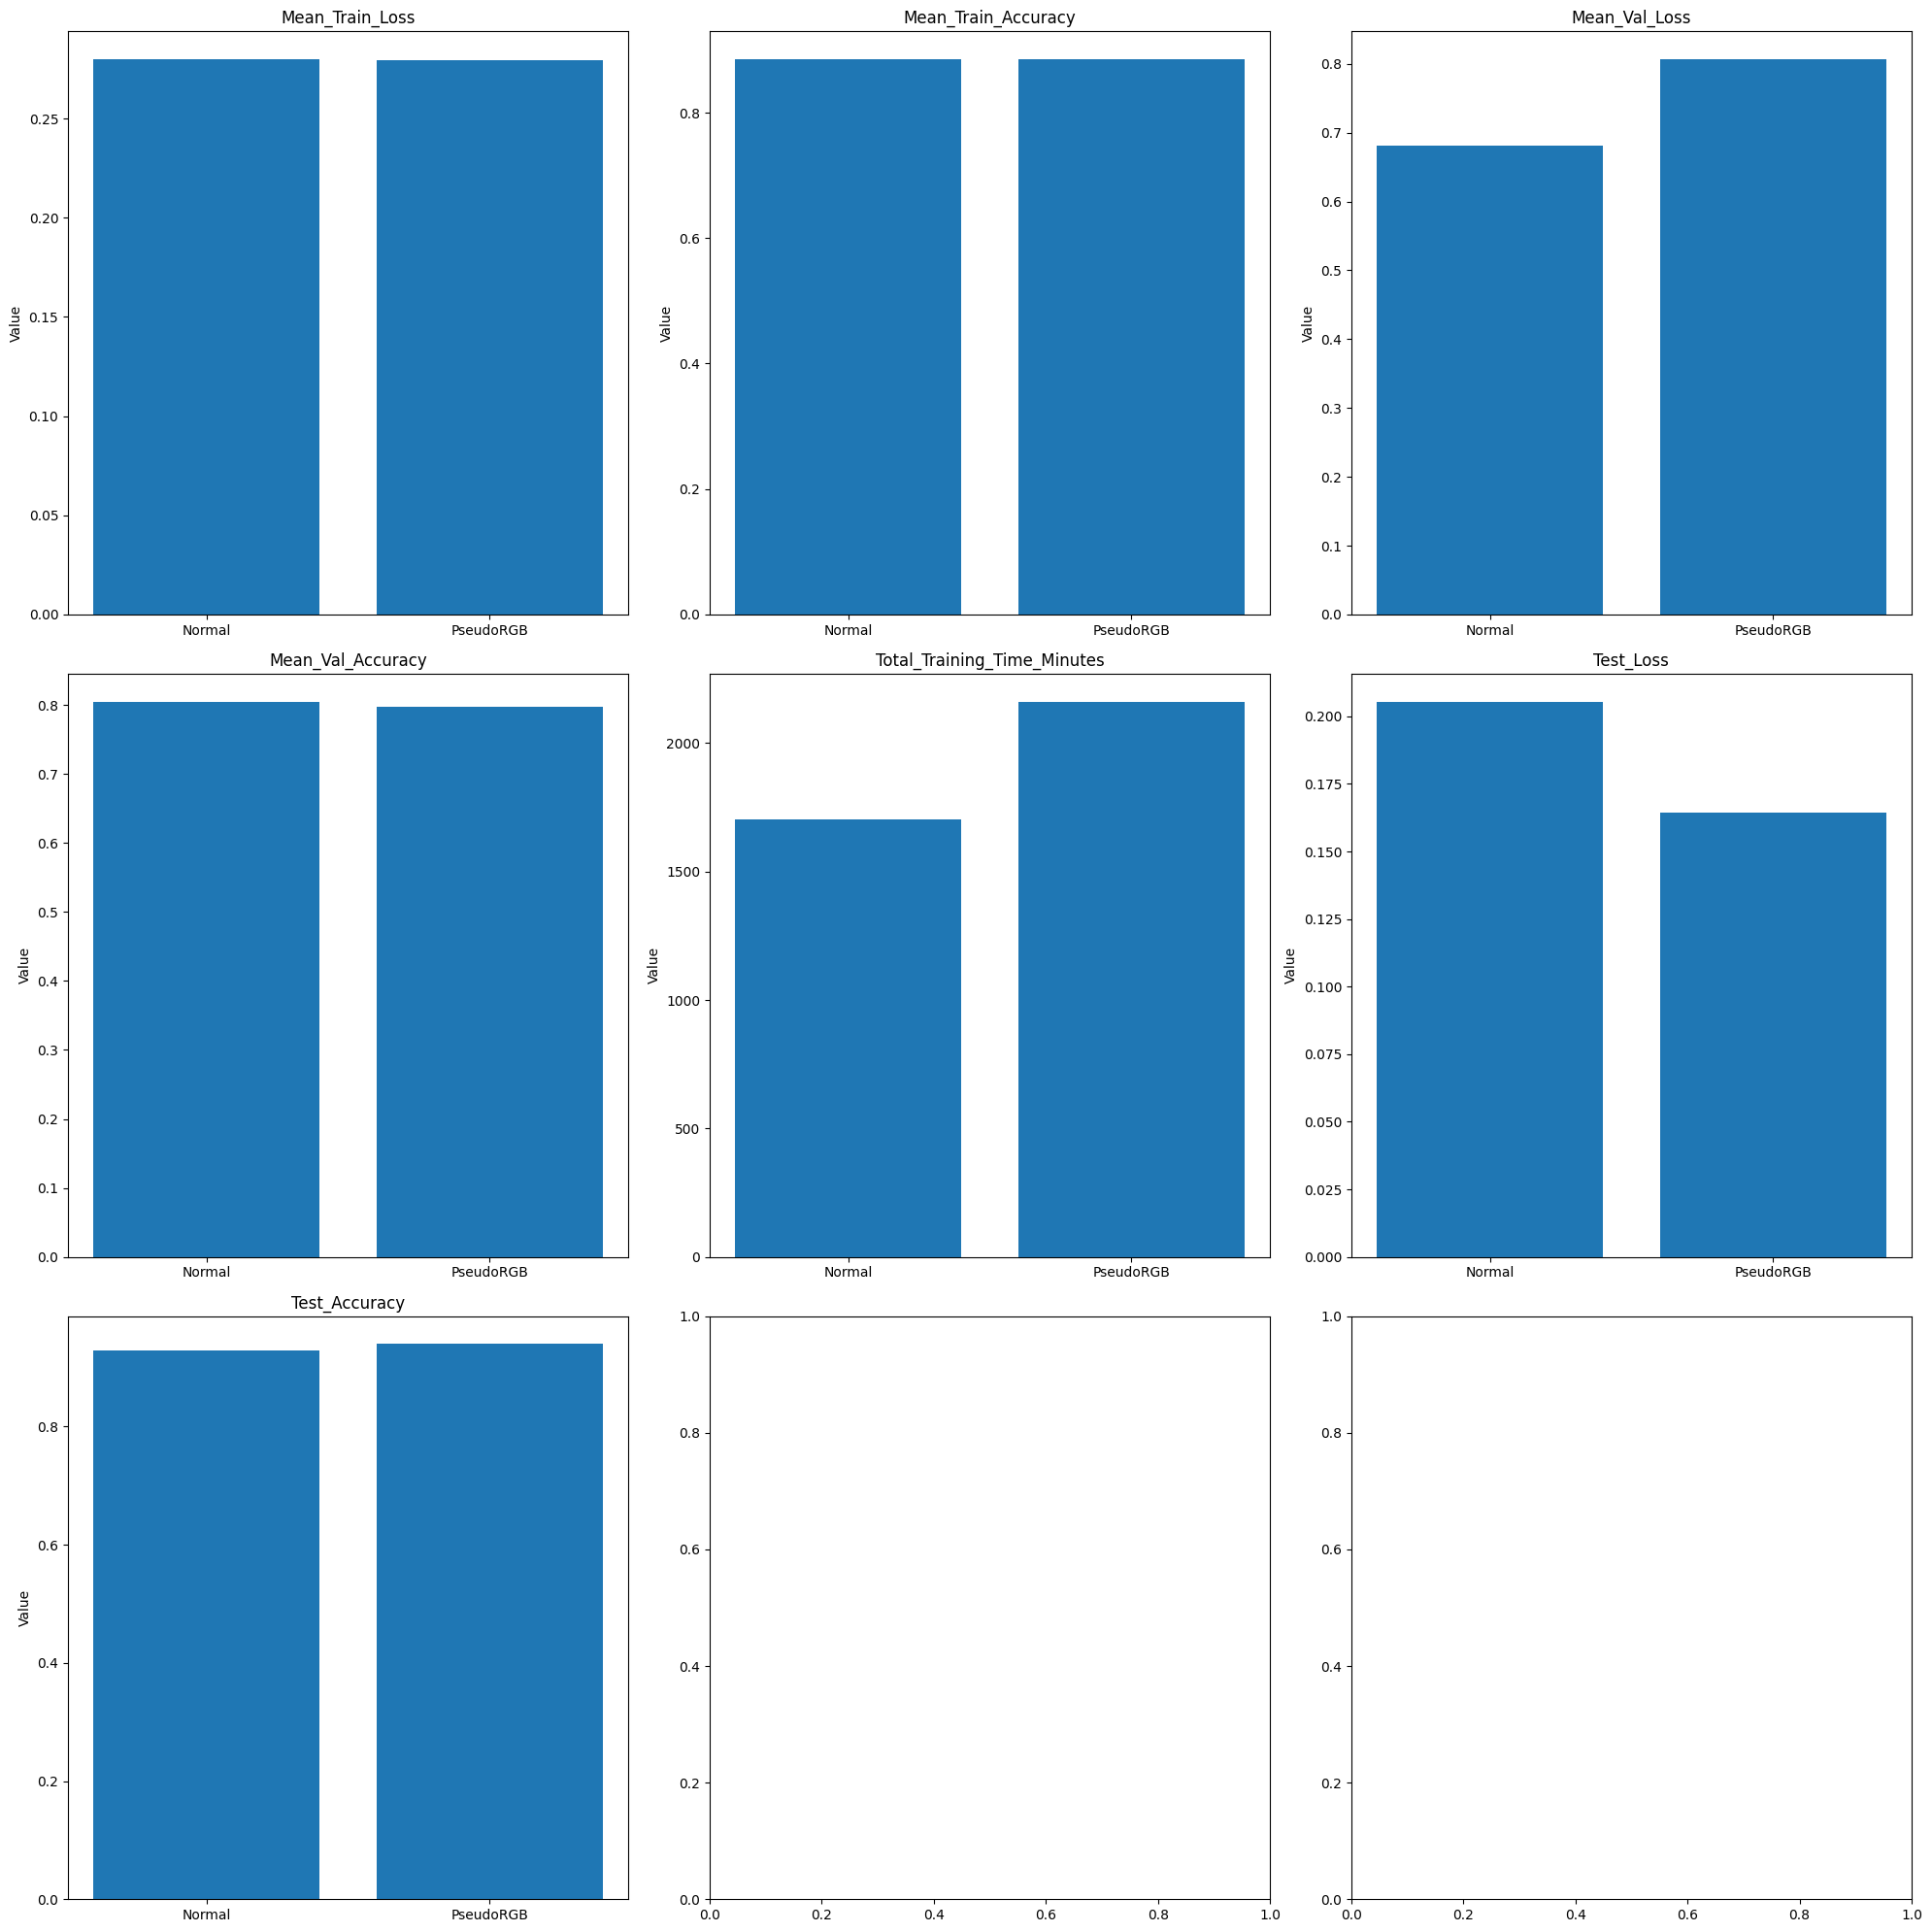

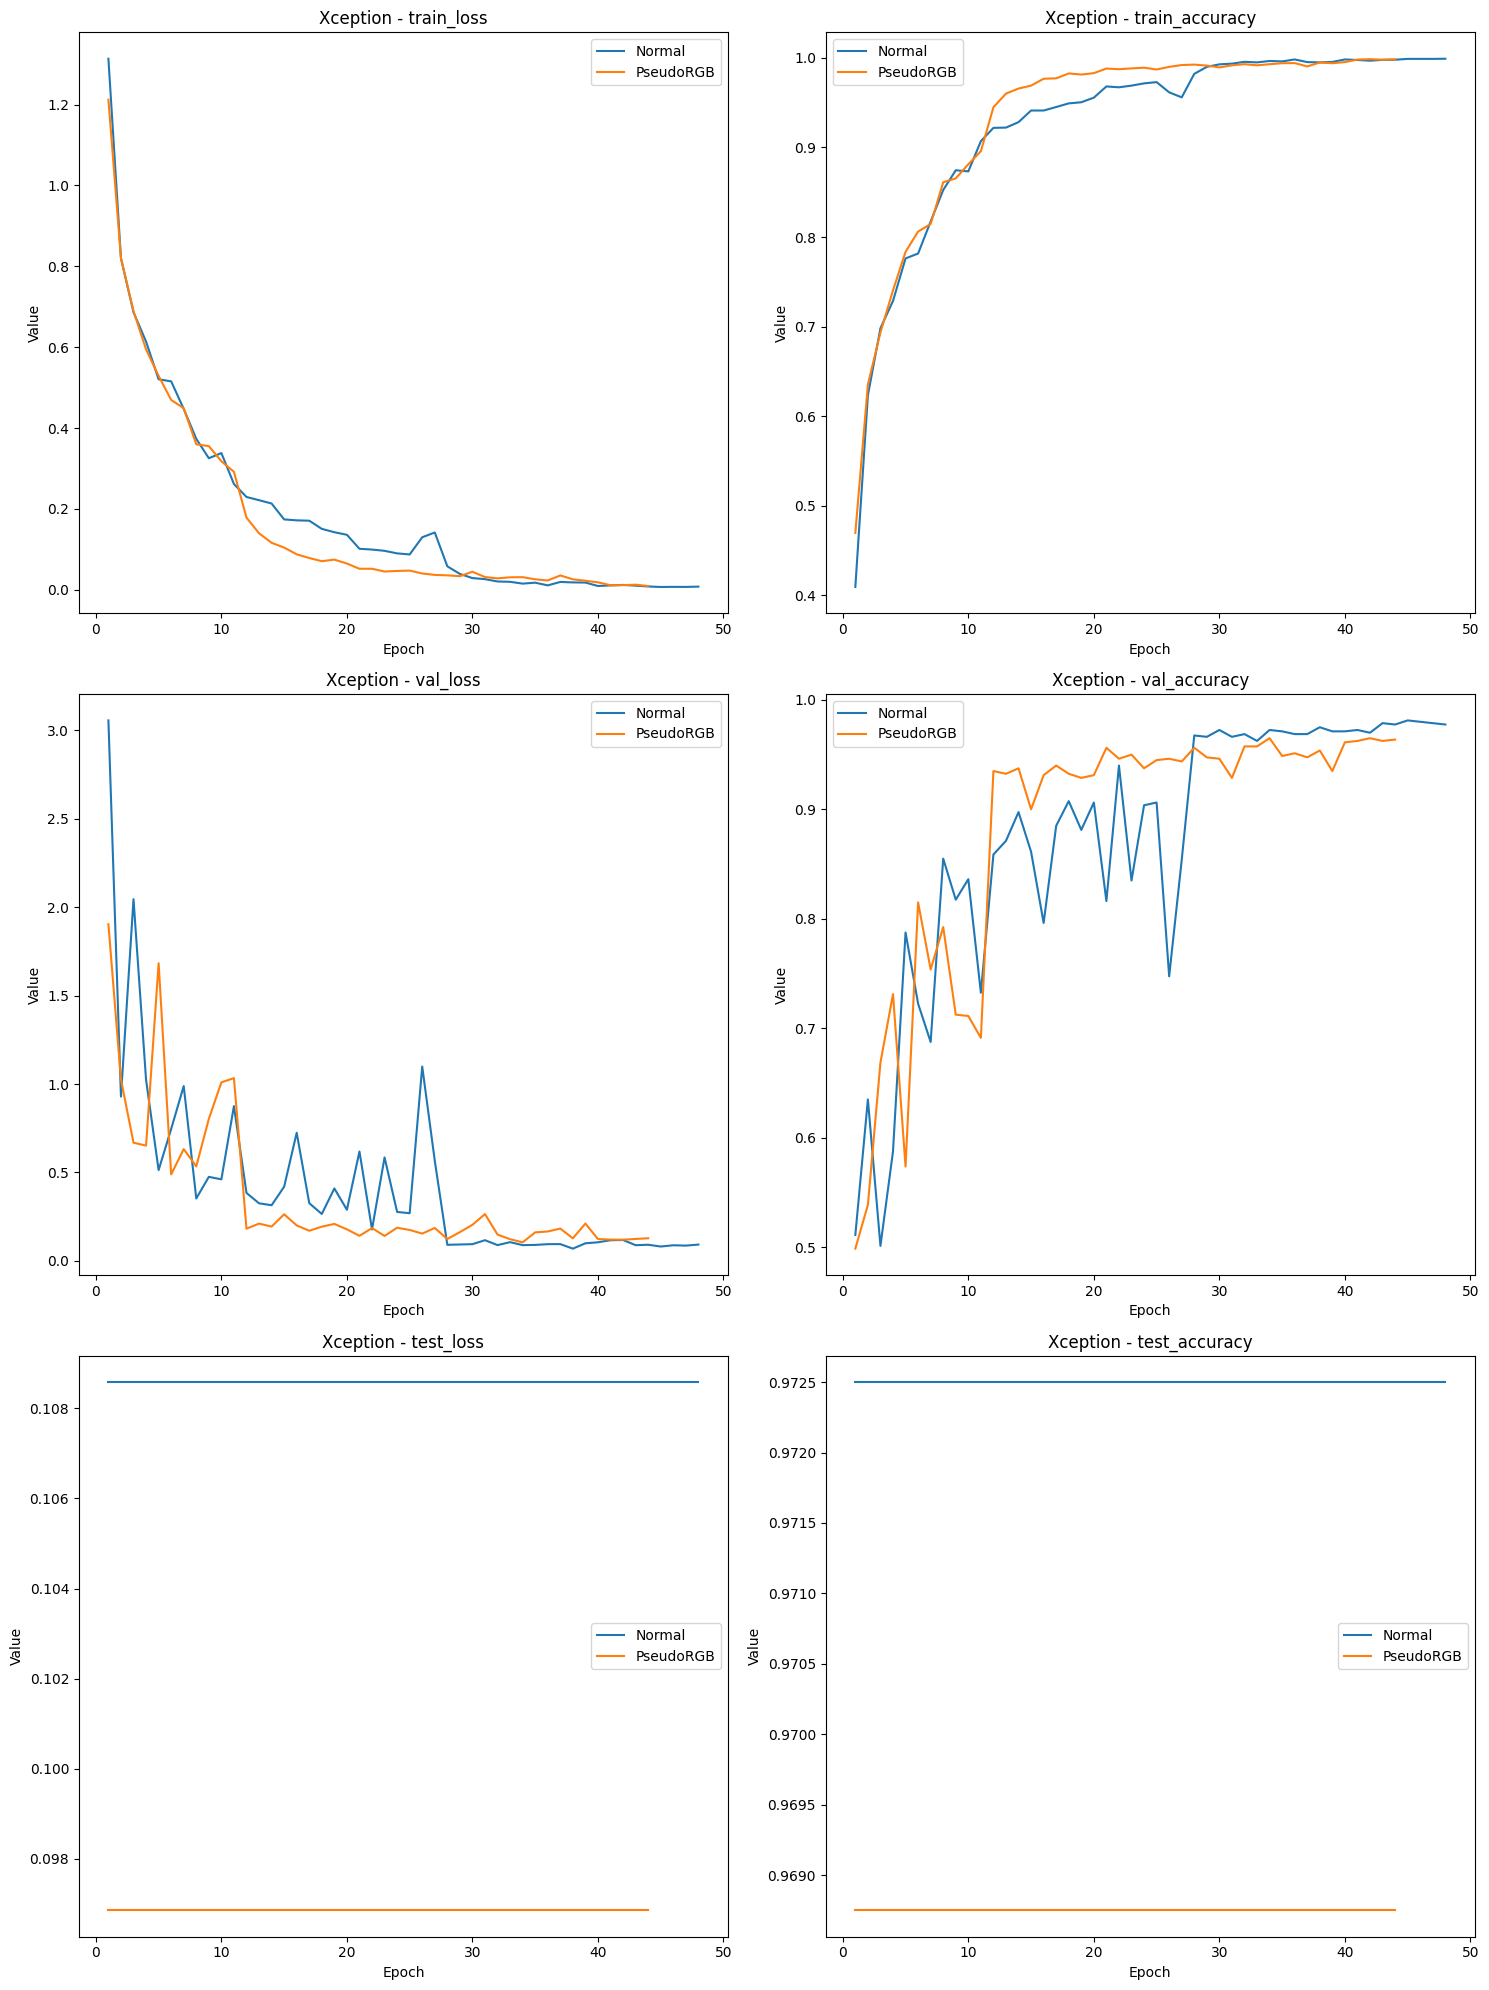

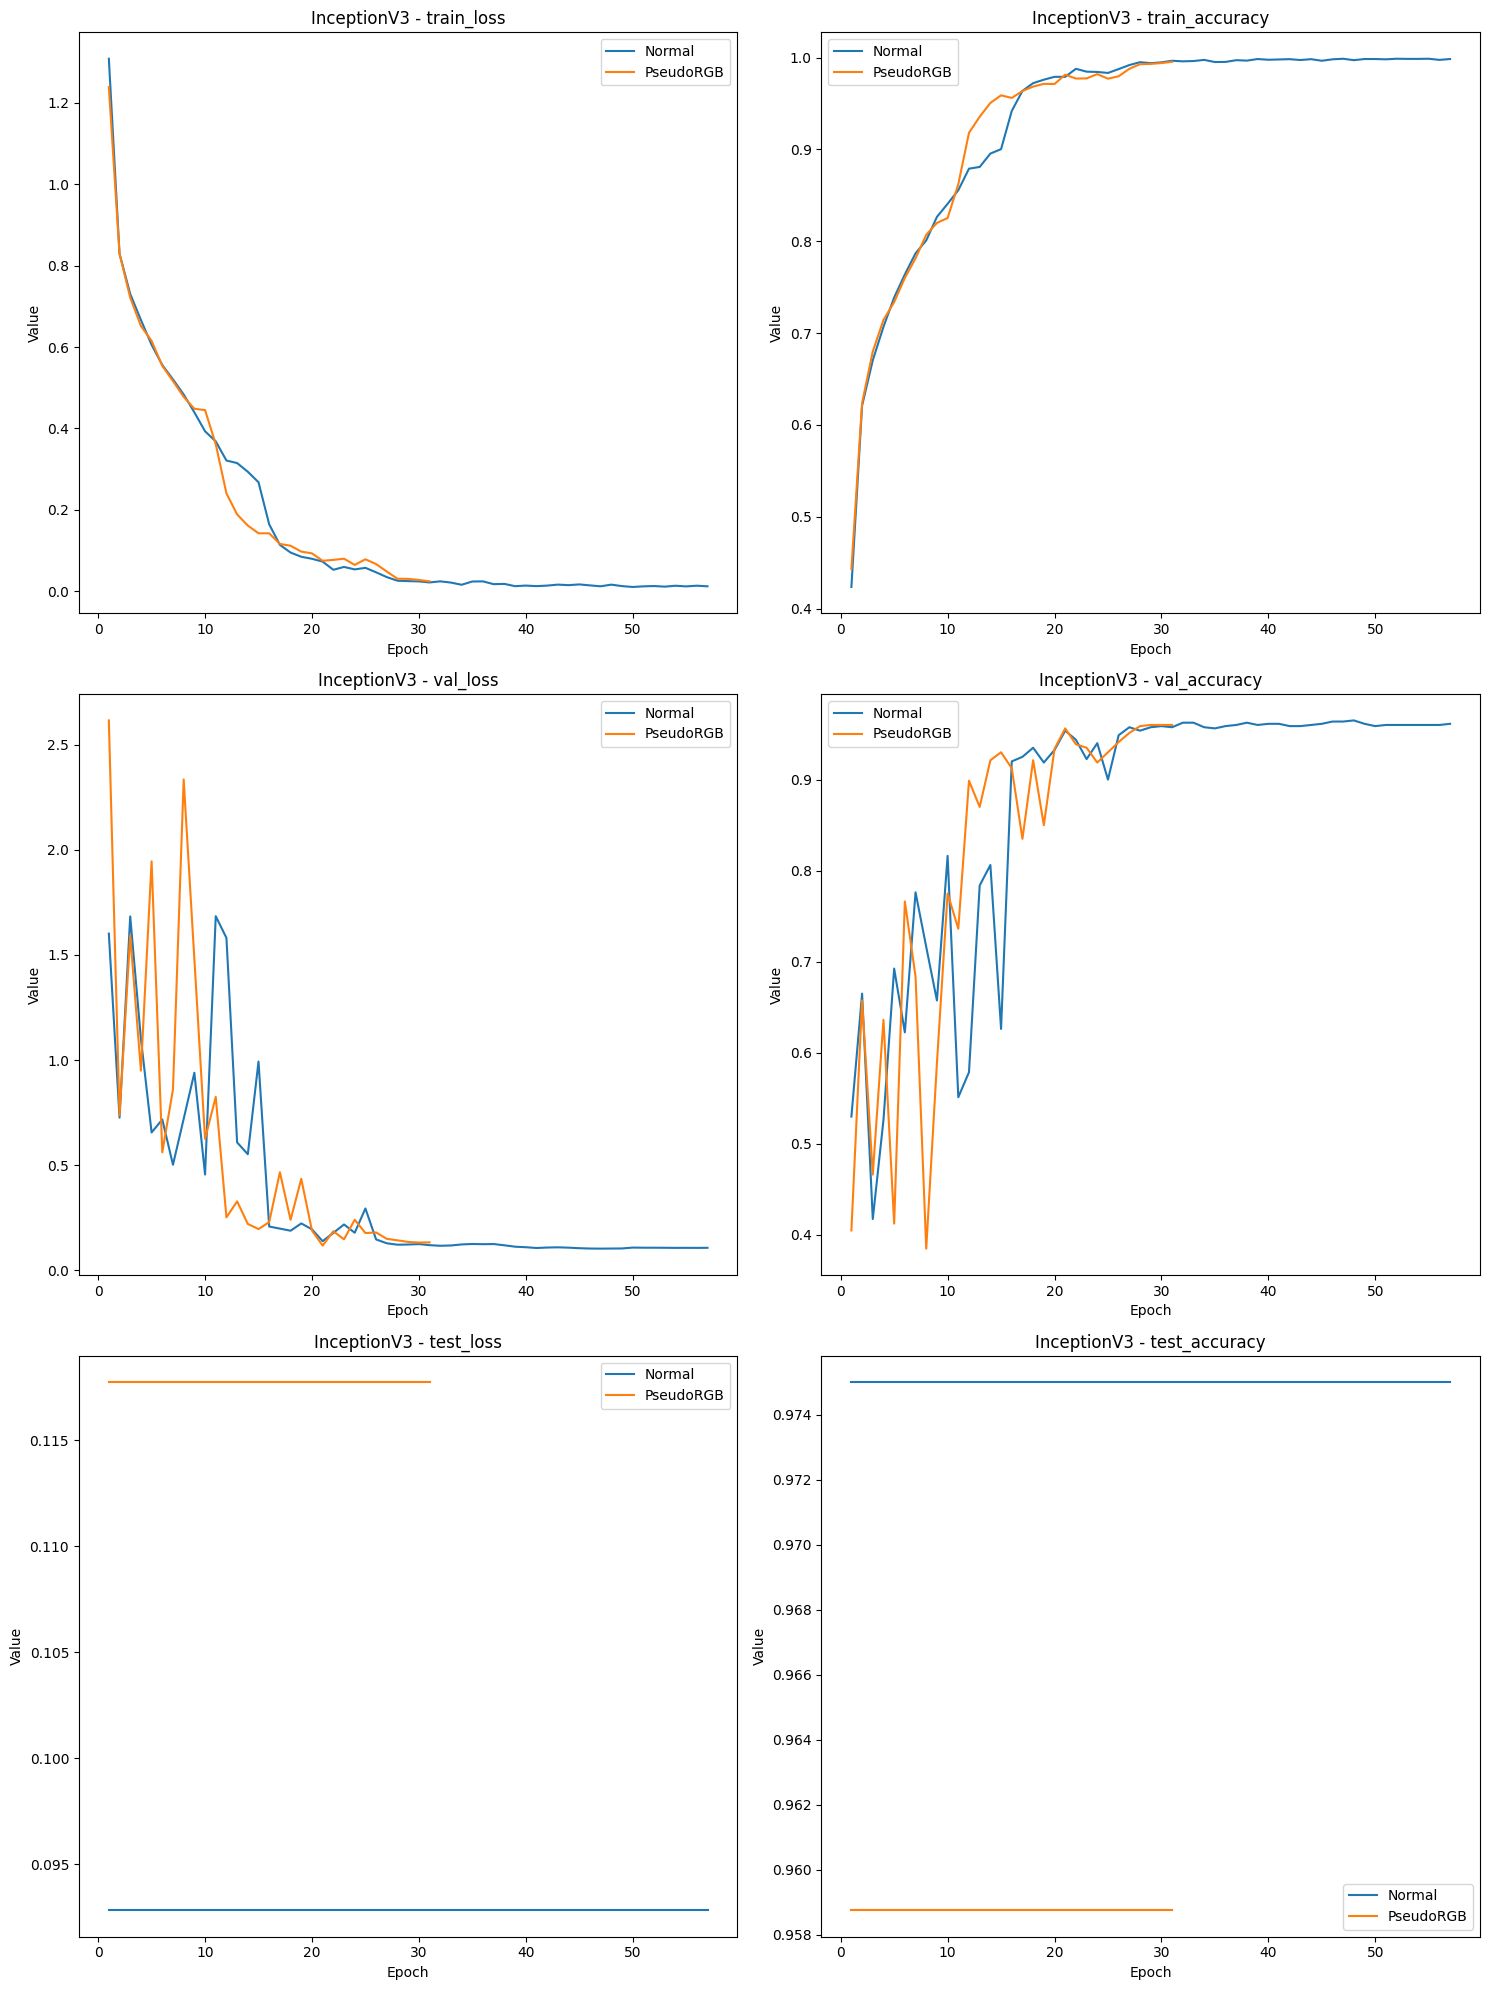

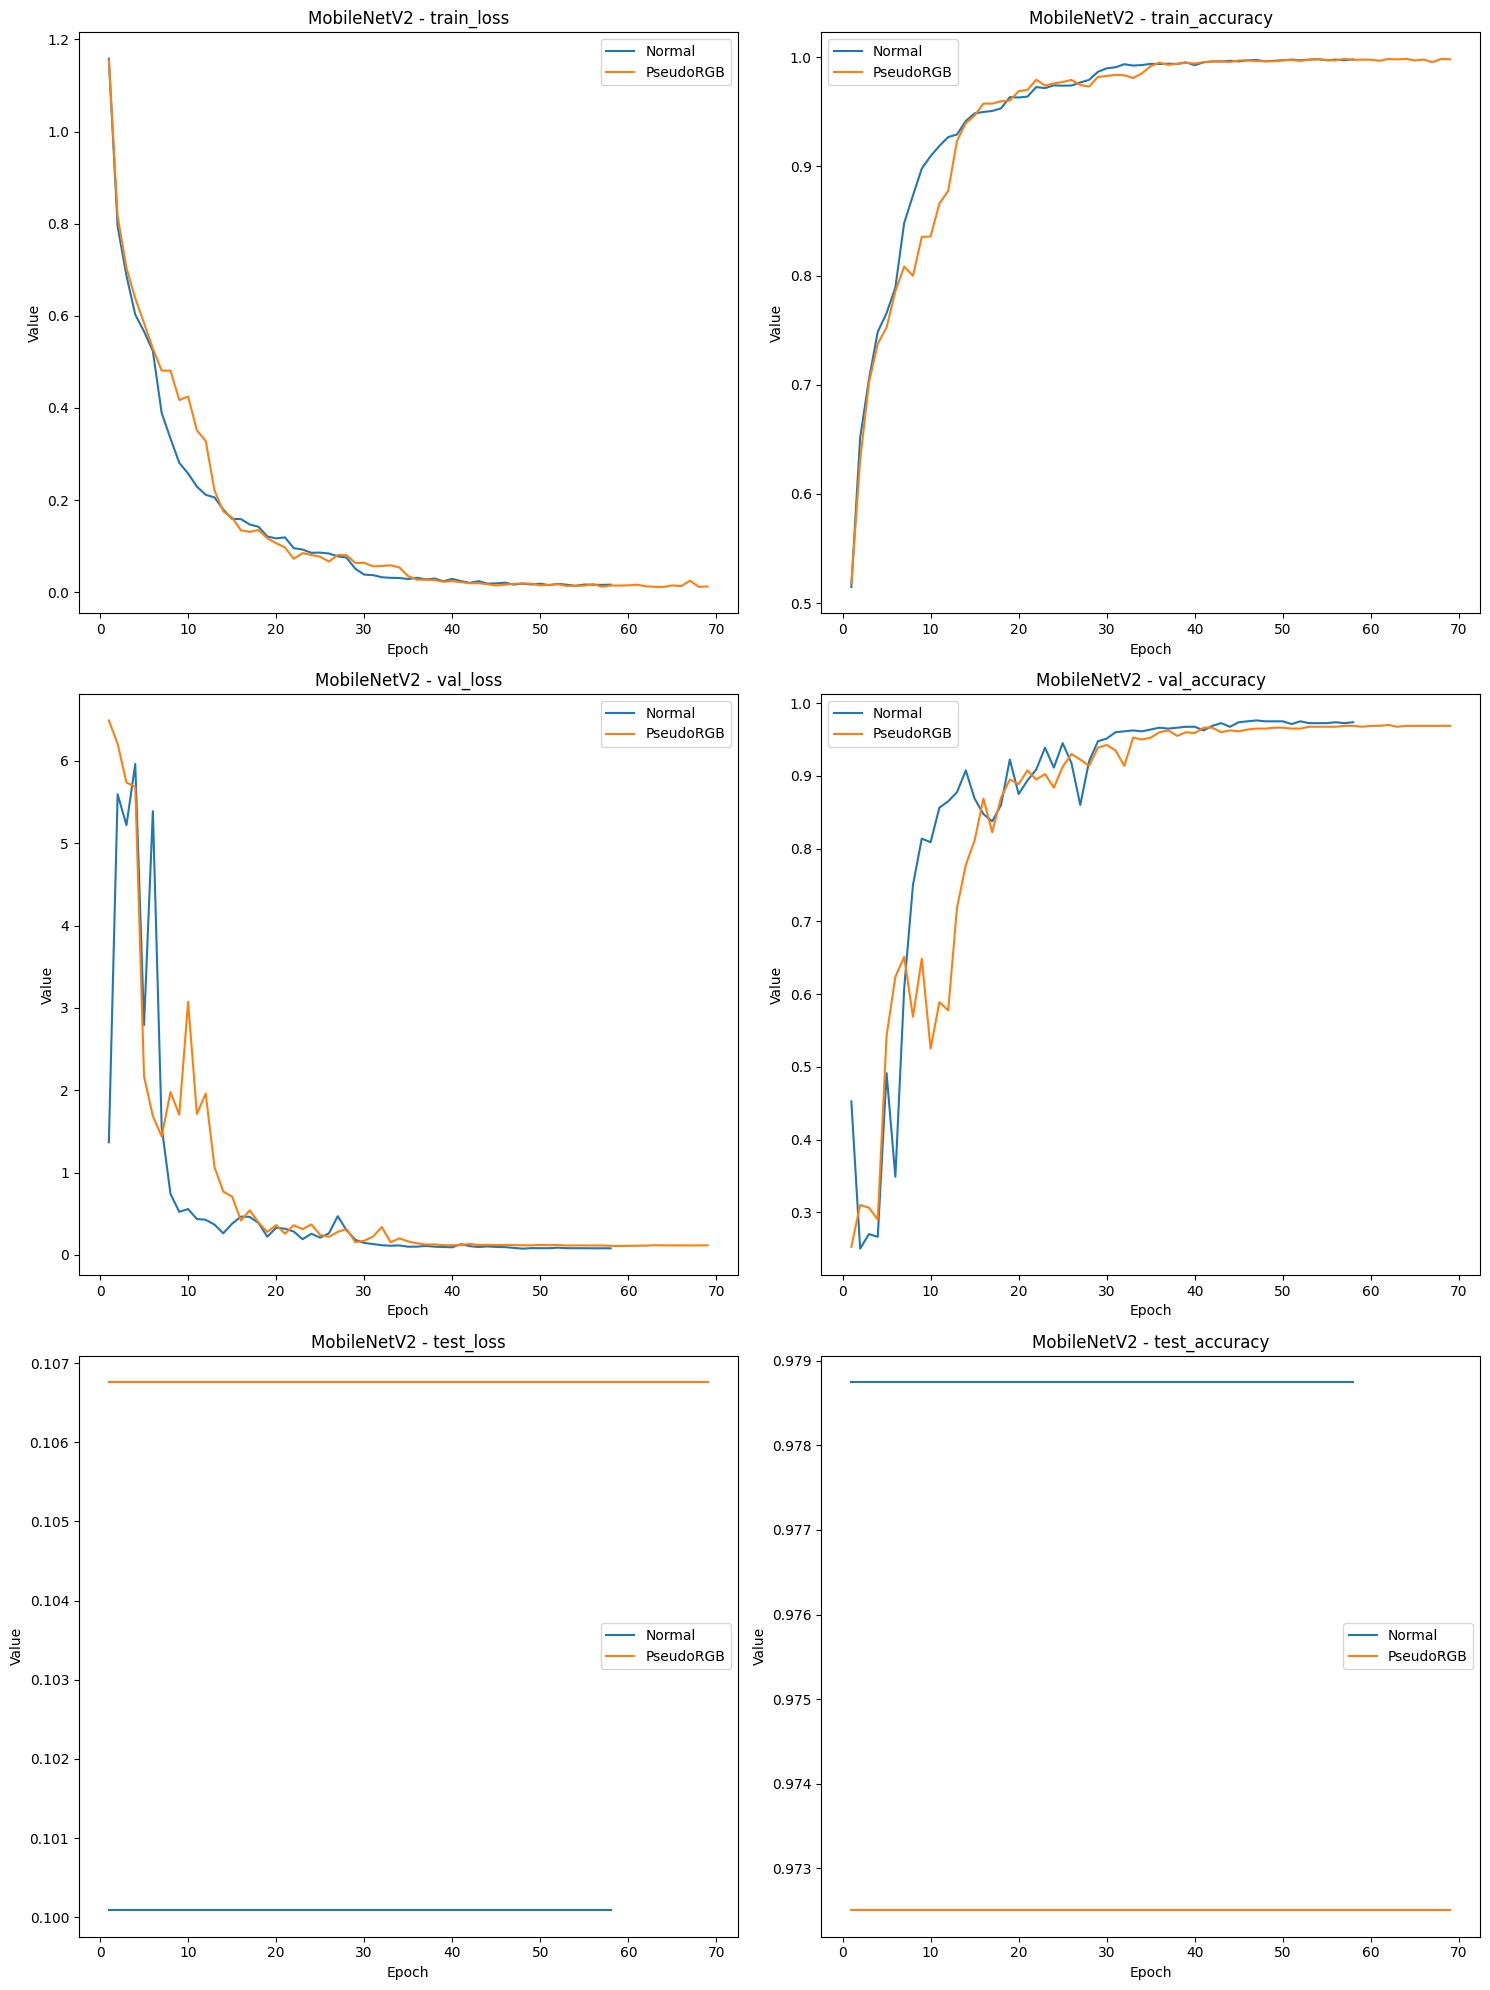

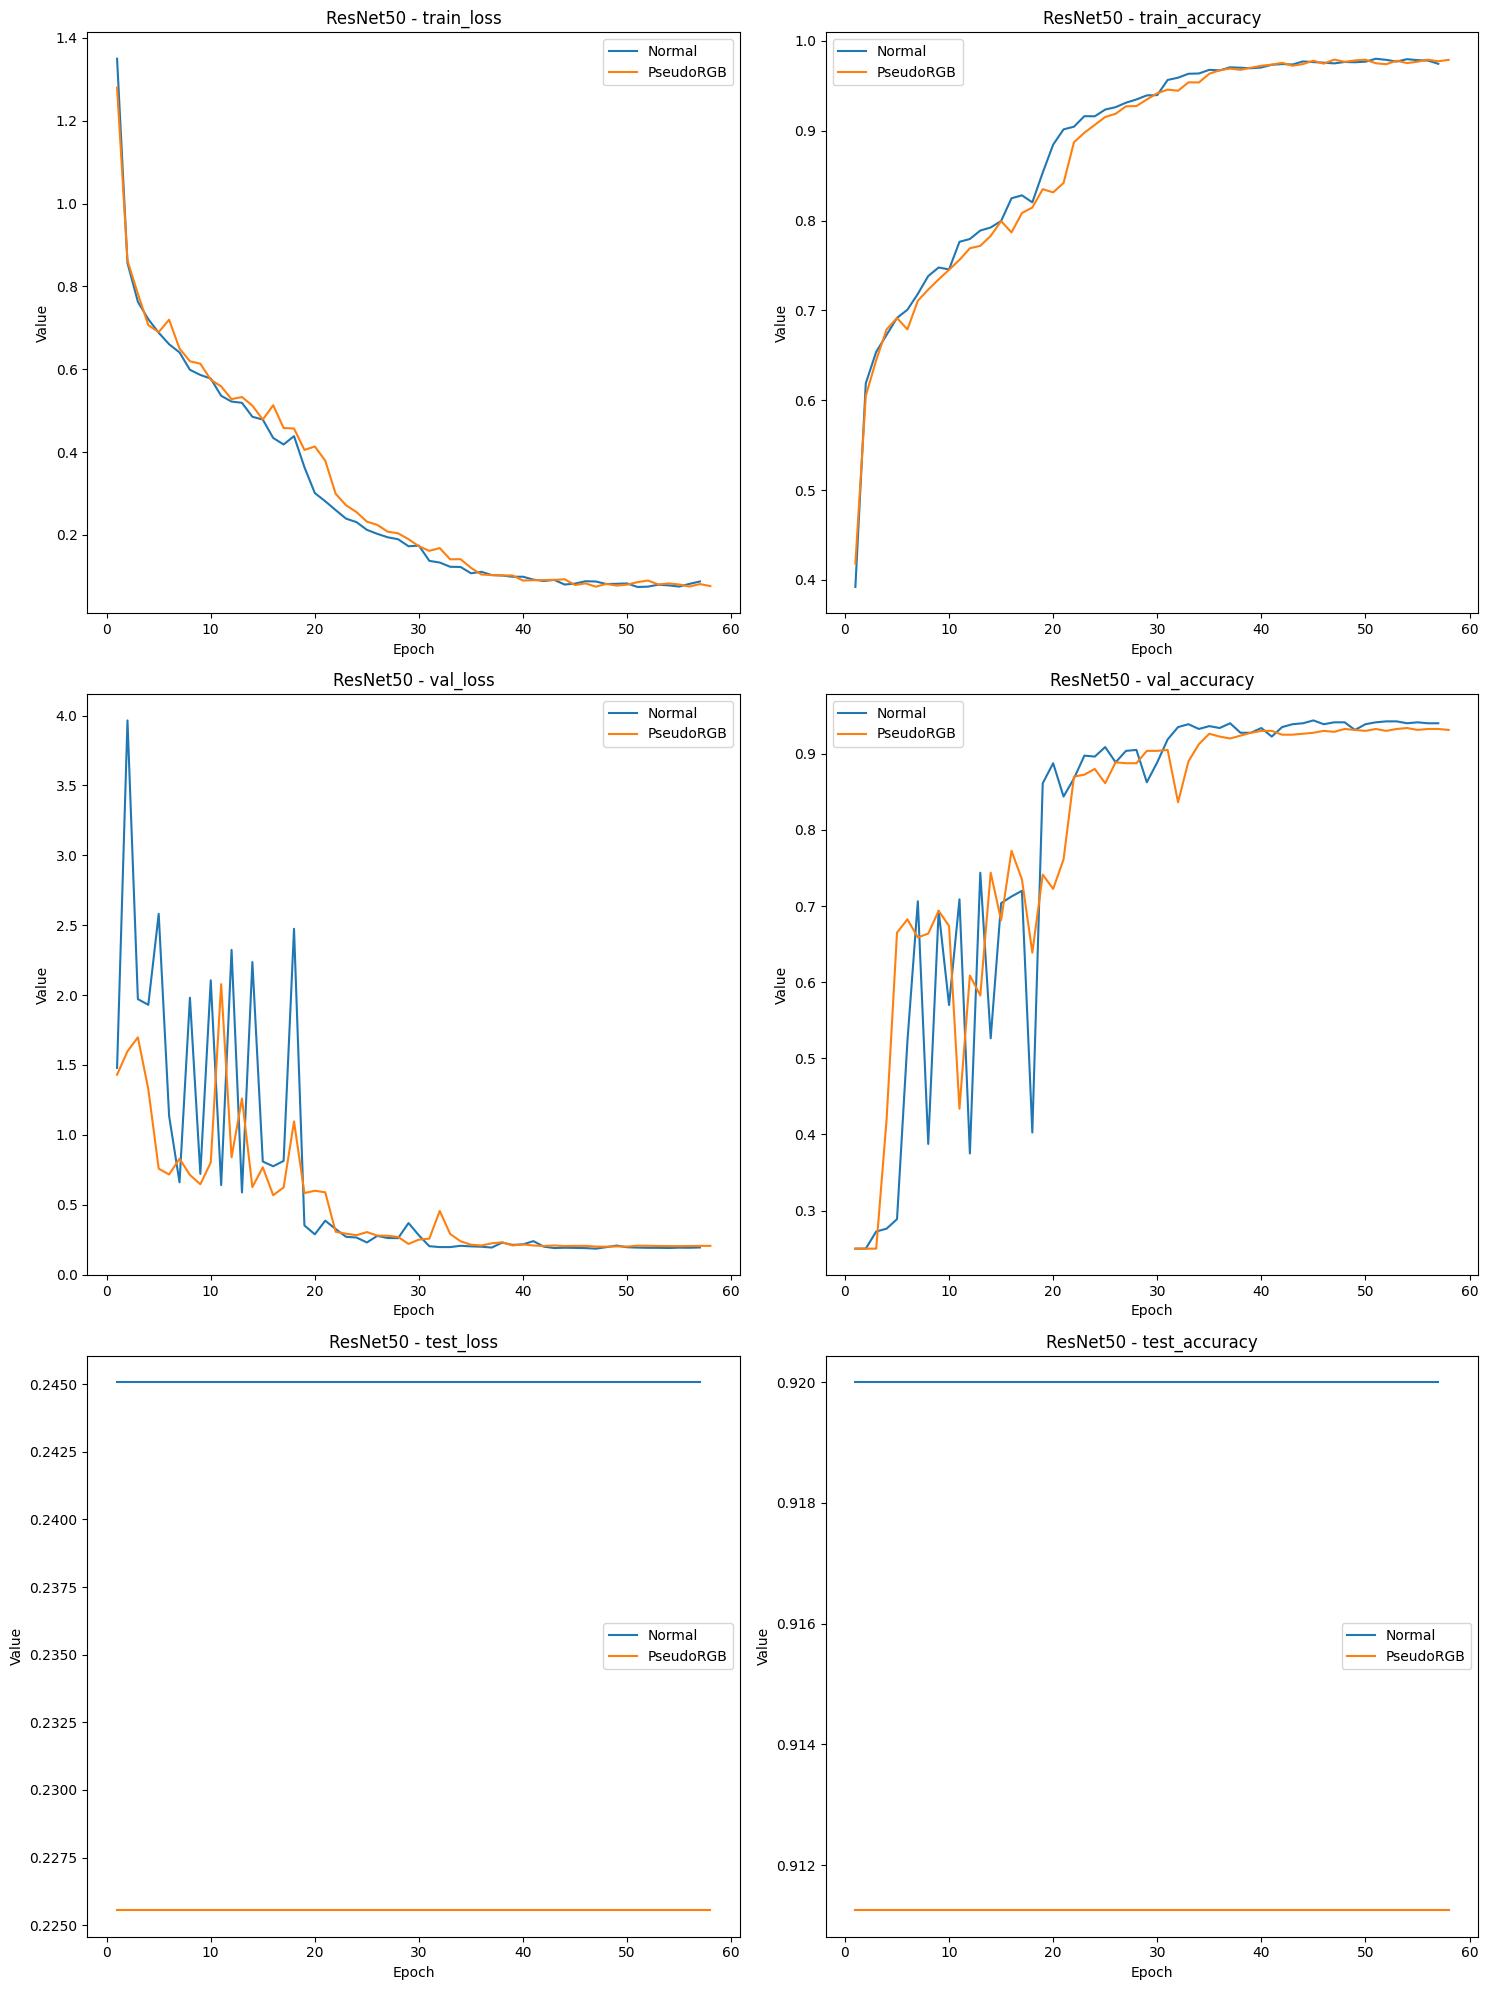

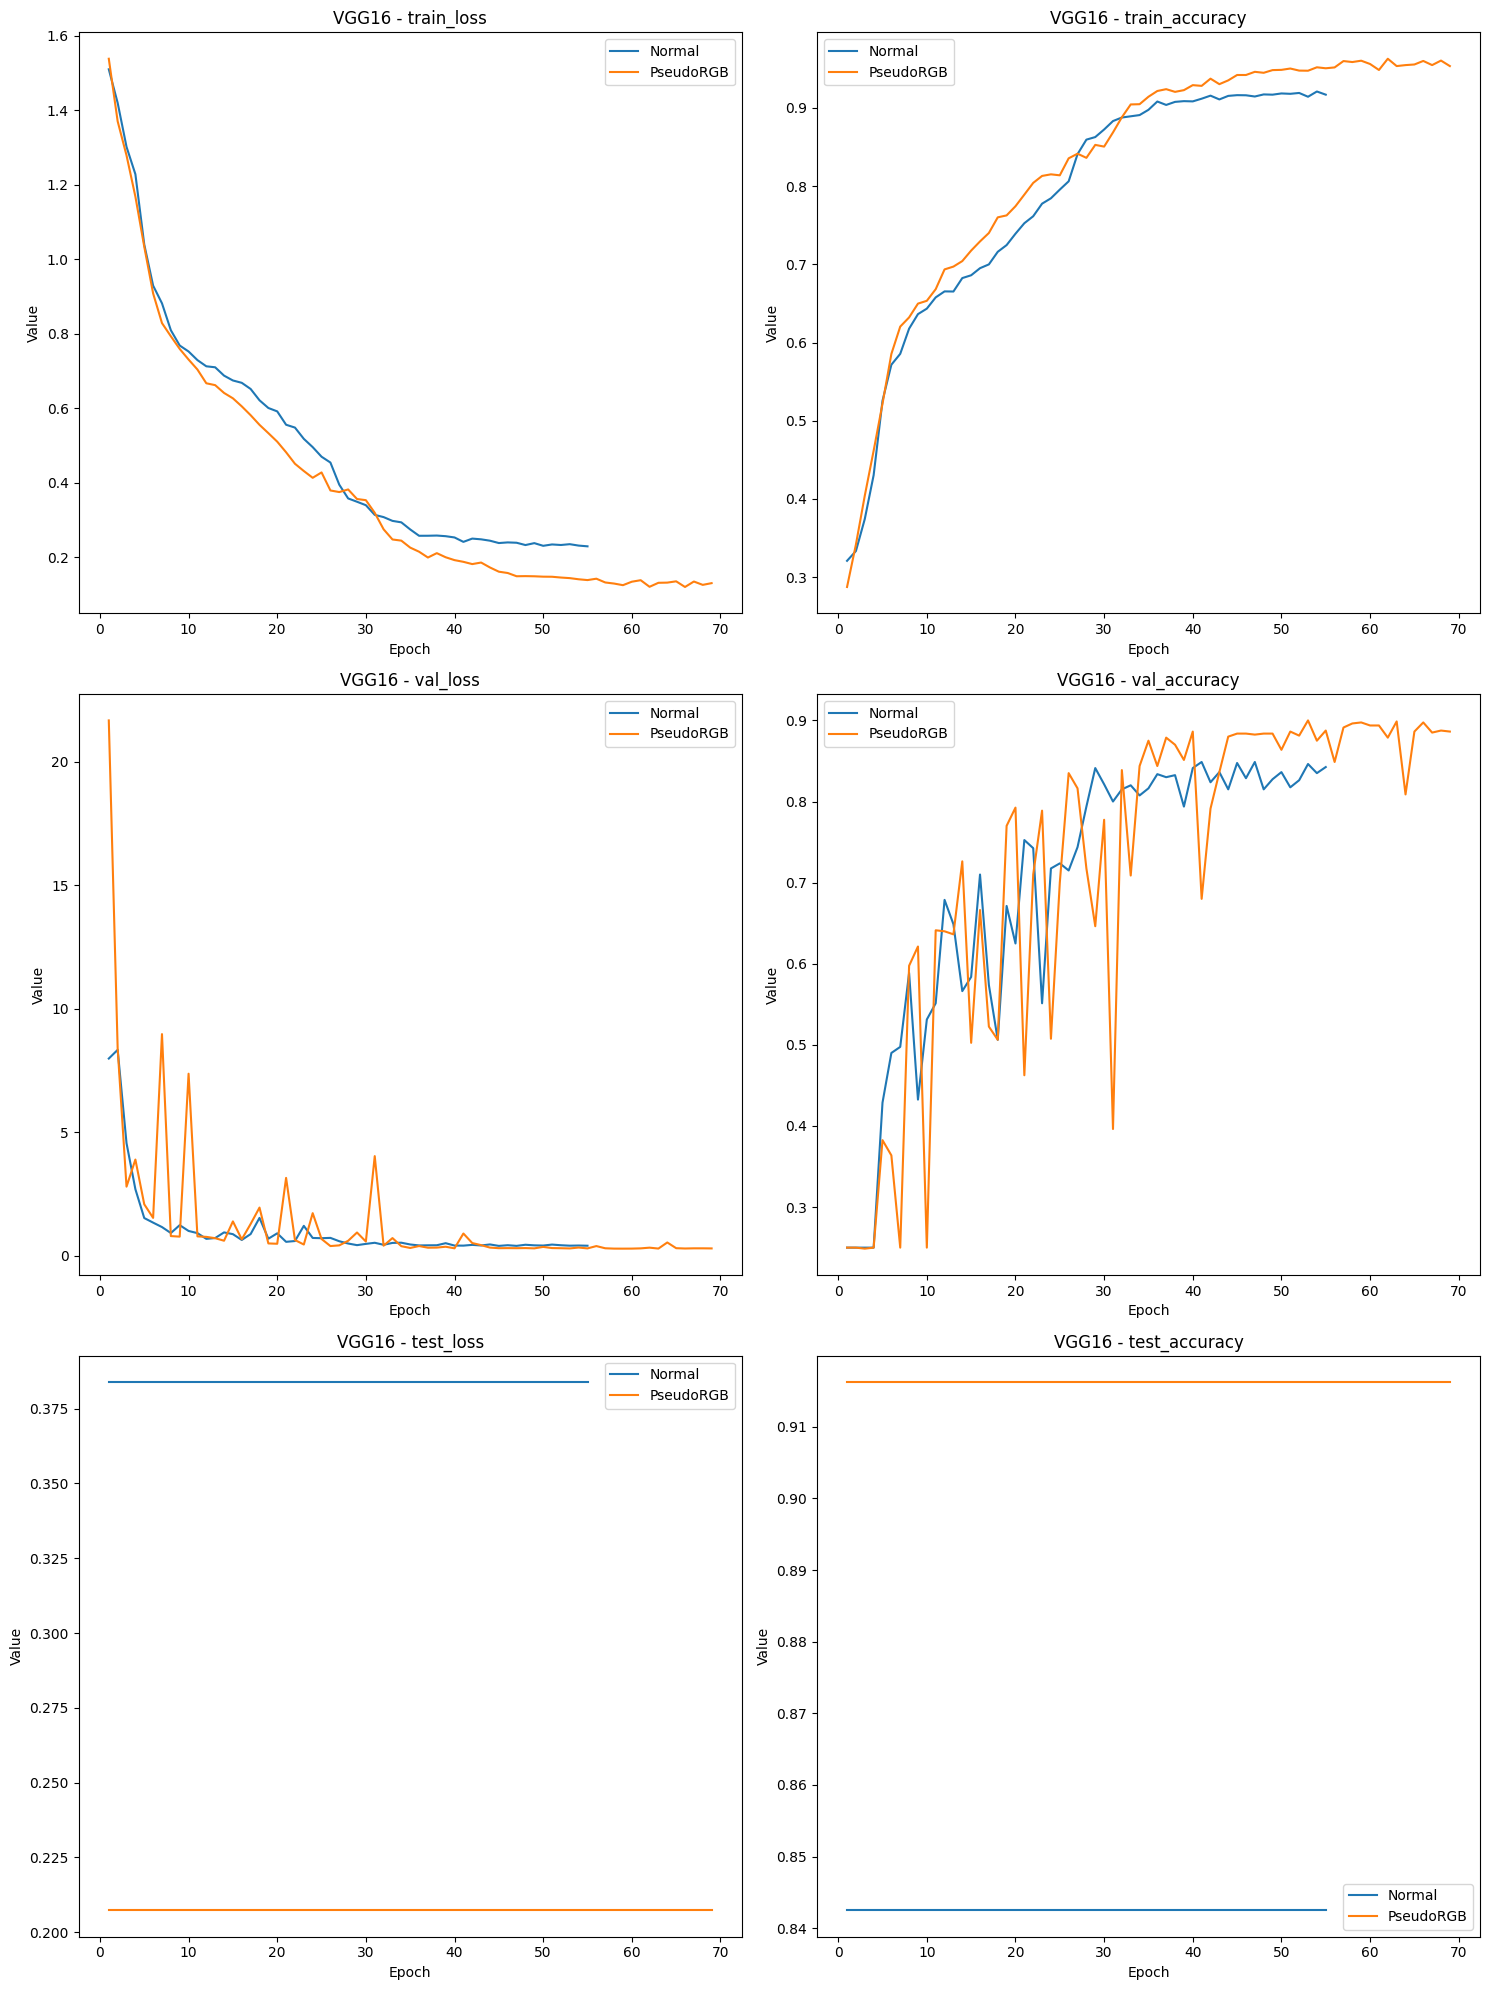

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def find_csv_file(folder, subfolder, file_type):
    for file in all_data[folder][subfolder].keys():
        if file_type in file.lower():
            return file
    return None


def compare_datasets():
    metrics = [
        "Mean_Train_Loss",
        "Mean_Train_Accuracy",
        "Mean_Val_Loss",
        "Mean_Val_Accuracy",
        "Total_Training_Time_Minutes",
        "Test_Loss",
        "Test_Accuracy",
    ]

    results = {metric: {"normal": [], "pseudo": []} for metric in metrics}

    for subfolder in subfolders:
        normal_summary_file = find_csv_file(
            "on_normal_dataset", subfolder, "summary_metrics"
        )
        pseudo_summary_file = find_csv_file(
            "on_pseudo_RGB_dataset", subfolder, "summary_metrics"
        )

        if normal_summary_file and pseudo_summary_file:
            normal_summary = all_data["on_normal_dataset"][subfolder][
                normal_summary_file
            ]
            pseudo_summary = all_data["on_pseudo_RGB_dataset"][subfolder][
                pseudo_summary_file
            ]

            for metric in metrics:
                if (
                    metric in normal_summary.columns
                    and metric in pseudo_summary.columns
                ):
                    results[metric]["normal"].append(normal_summary[metric].values[0])
                    results[metric]["pseudo"].append(pseudo_summary[metric].values[0])

    # Calculate averages and improvements
    summary = {}
    for metric in metrics:
        if results[metric]["normal"] and results[metric]["pseudo"]:
            normal_avg = np.mean(results[metric]["normal"])
            pseudo_avg = np.mean(results[metric]["pseudo"])
            improvement = ((pseudo_avg - normal_avg) / normal_avg) * 100

            summary[metric] = {
                "Normal Average": normal_avg,
                "PseudoRGB Average": pseudo_avg,
                "Improvement (%)": improvement,
            }

    summary_df = pd.DataFrame(summary).T

    # Print summary
    print(summary_df)

    # Plot comparisons
    fig, axes = plt.subplots(3, 3, figsize=(20, 20))
    axes = axes.flatten()

    for i, (metric, data) in enumerate(results.items()):
        if data["normal"] and data["pseudo"]:
            ax = axes[i]
            ax.bar(
                ["Normal", "PseudoRGB"],
                [np.mean(data["normal"]), np.mean(data["pseudo"])],
            )
            ax.set_title(metric)
            ax.set_ylabel("Value")

    plt.tight_layout()
    plt.show()

    return summary_df


def compare_best_optimizer_metrics():
    metrics = [
        "train_loss",
        "train_accuracy",
        "val_loss",
        "val_accuracy",
        "test_loss",
        "test_accuracy",
    ]

    for subfolder in subfolders:
        normal_file = find_csv_file(
            "on_normal_dataset", subfolder, "best_optimizer_metrics"
        )
        pseudo_file = find_csv_file(
            "on_pseudo_RGB_dataset", subfolder, "best_optimizer_metrics"
        )

        if normal_file and pseudo_file:
            normal_data = all_data["on_normal_dataset"][subfolder][normal_file]
            pseudo_data = all_data["on_pseudo_RGB_dataset"][subfolder][pseudo_file]

            fig, axes = plt.subplots(3, 2, figsize=(15, 20))
            axes = axes.flatten()

            for i, metric in enumerate(metrics):
                if metric in normal_data.columns and metric in pseudo_data.columns:
                    ax = axes[i]
                    ax.plot(normal_data["epoch"], normal_data[metric], label="Normal")
                    ax.plot(
                        pseudo_data["epoch"], pseudo_data[metric], label="PseudoRGB"
                    )
                    ax.set_title(f"{subfolder} - {metric}")
                    ax.set_xlabel("Epoch")
                    ax.set_ylabel("Value")
                    ax.legend()

            plt.tight_layout()
            plt.show()


# Run the comparisons
comparison_results = compare_datasets()
compare_best_optimizer_metrics()

In [5]:
comparison_results.to_csv('comparision_results.csv')
comparison_results

,Normal Average,PseudoRGB Average,Improvement (%)
Mean_Train_Loss,0.279983,0.279370,-0.218984
Mean_Train_Accuracy,0.885019,0.885290,0.030642
Mean_Val_Loss,0.680600,0.806751,18.535247
Mean_Val_Accuracy,0.805182,0.797642,-0.936474
Total_Training_Time_Minutes,1702.866255,2162.045721,26.965093
Test_Loss,0.205464,0.164342,-20.014266
Test_Accuracy,0.929063,0.939688,1.143626


/tmp/ipykernel_84715/1447887829.py:52: RuntimeWarning: invalid value encountered in scalar divide
  improvement = ((pseudo_avg - normal_avg) / normal_avg) * 100


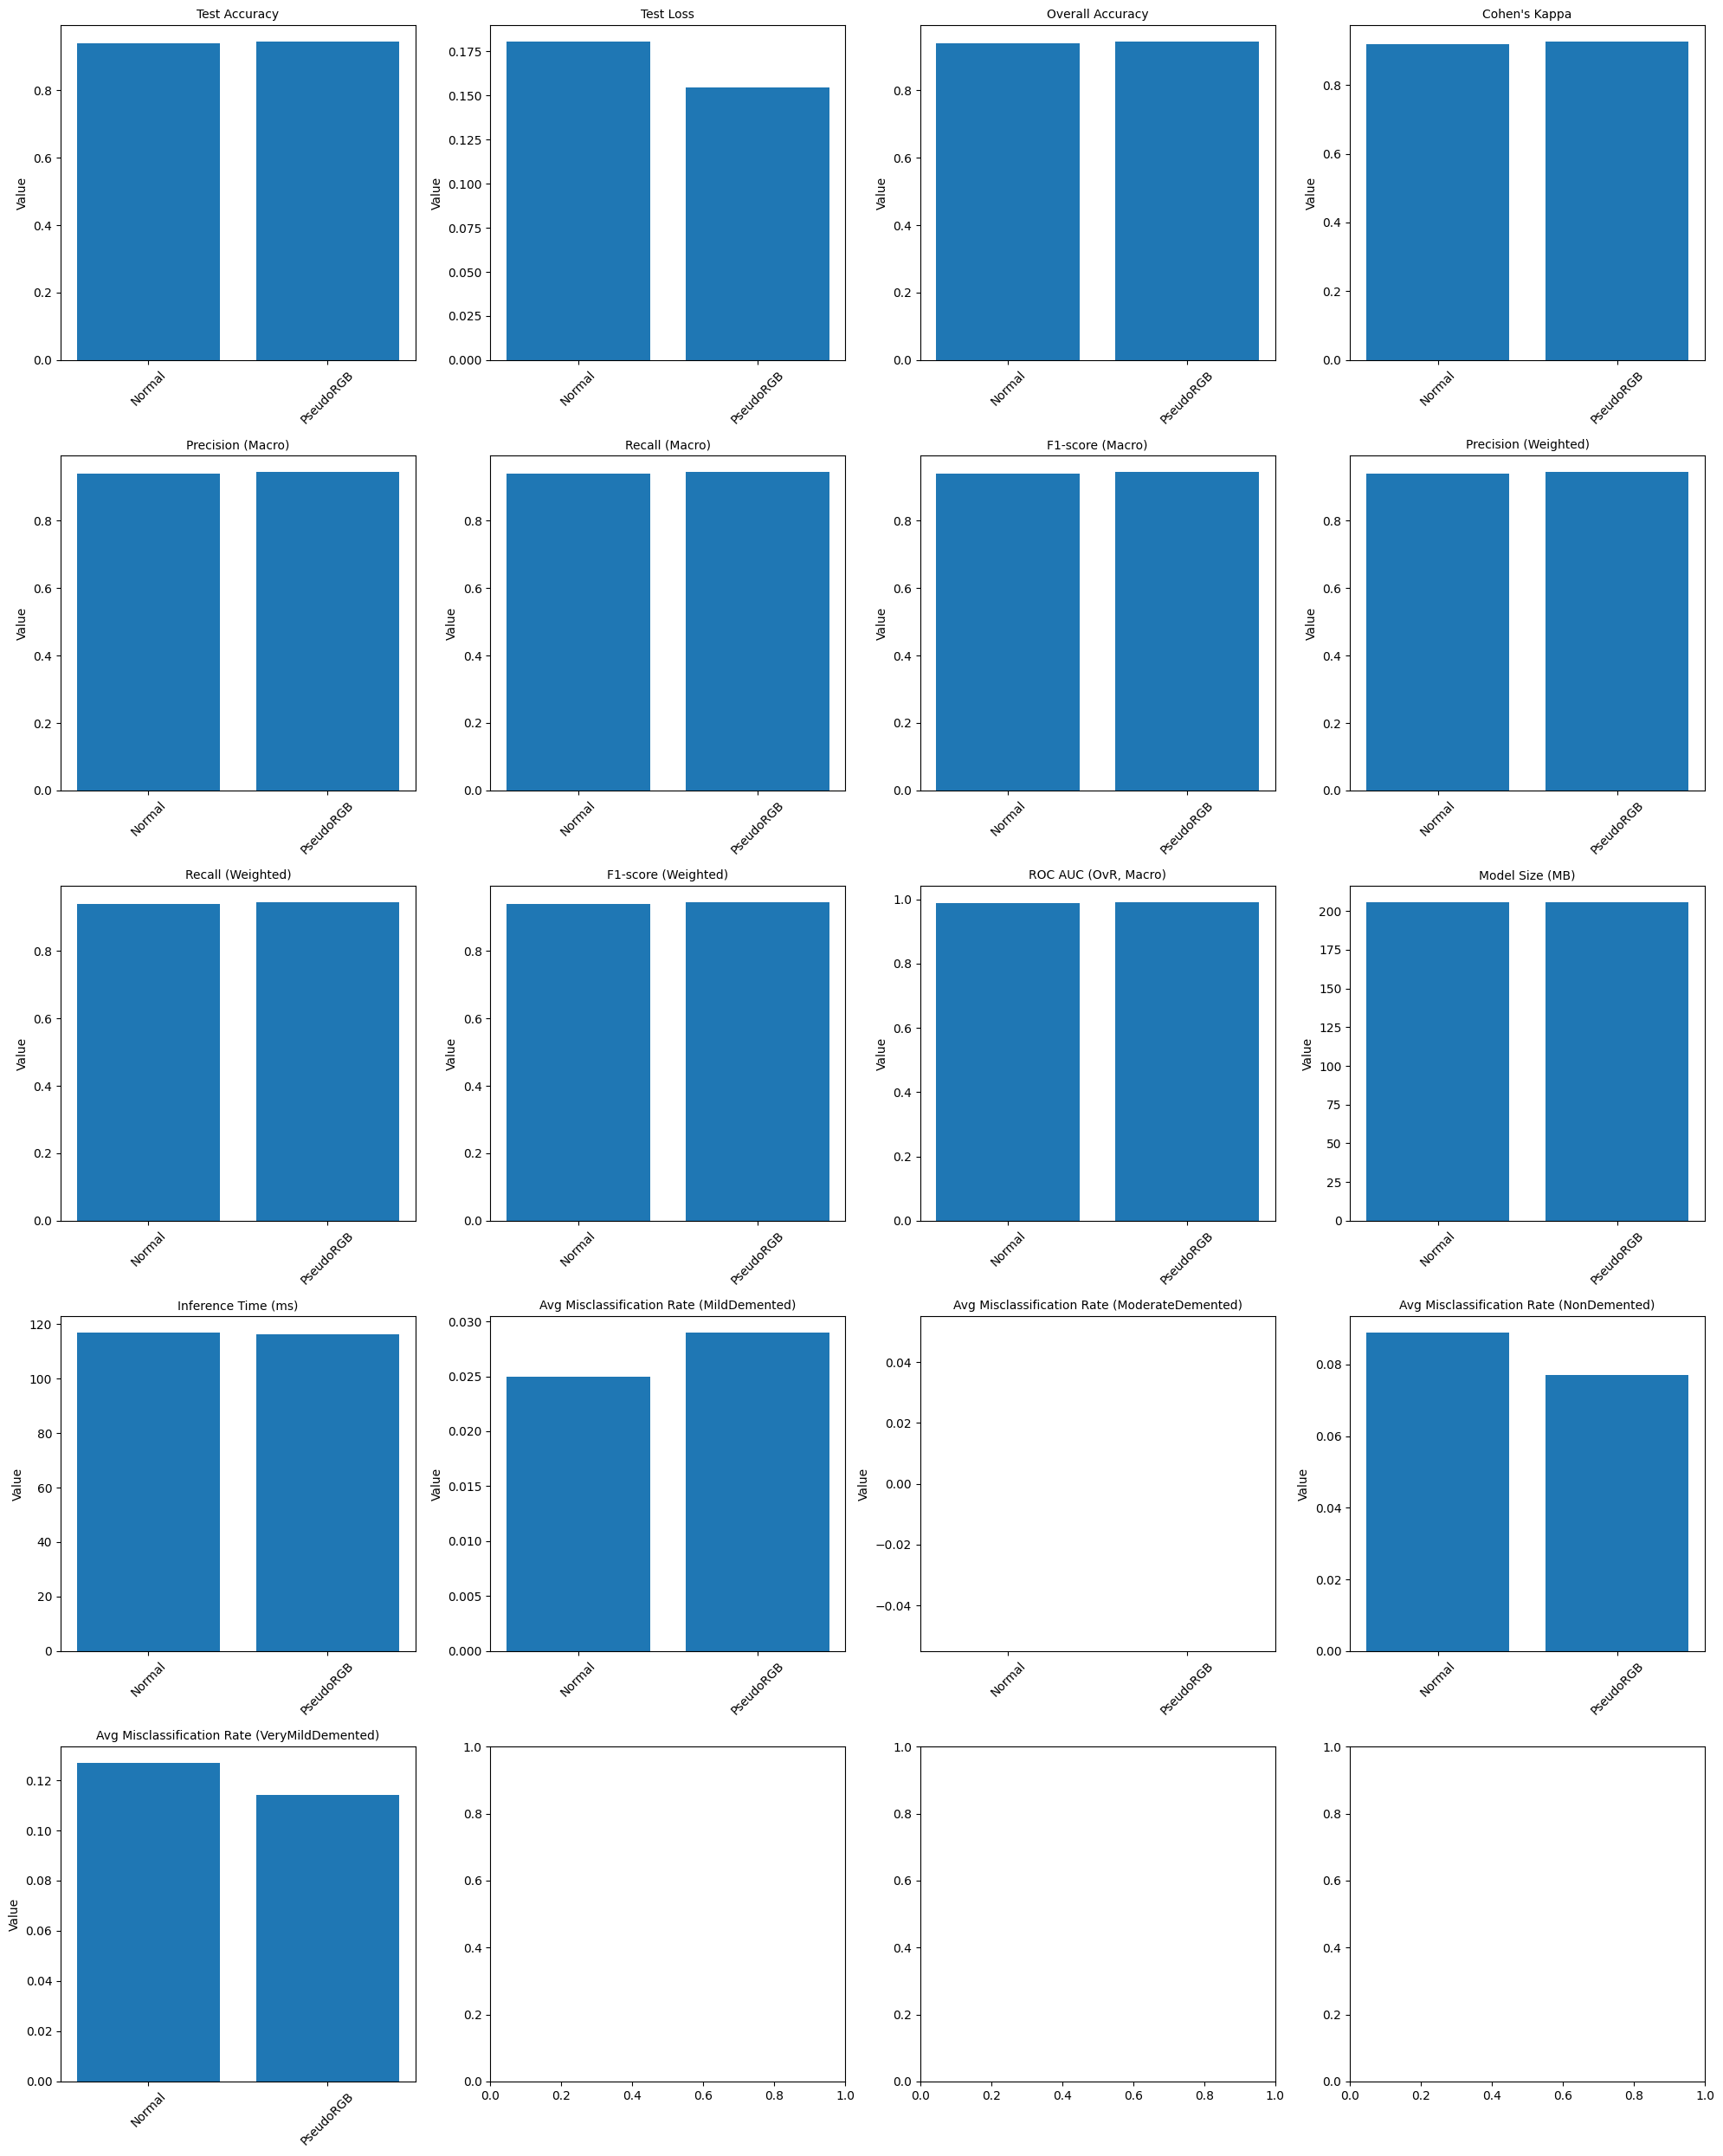

,Normal Average,PseudoRGB Average,Improvement (%)
Test Accuracy,0.939750,0.945000,5.586568e-01
Test Loss,0.180658,0.154400,-1.453479e+01
Overall Accuracy,0.939750,0.945000,5.586592e-01
Cohen's Kappa,0.919667,0.926667,7.611453e-01
Precision (Macro),0.939678,0.945679,6.386135e-01
Recall (Macro),0.939750,0.945000,5.586592e-01
F1-score (Macro),0.939566,0.945177,5.971502e-01
Precision (Weighted),0.939678,0.945679,6.386135e-01
Recall (Weighted),0.939750,0.945000,5.586592e-01
F1-score (Weighted),0.939566,0.945177,5.971502e-01


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def compare_segmented_multiclass():
    relevant_metrics = [
        "Test Accuracy",
        "Test Loss",
        "Overall Accuracy",
        "Cohen's Kappa",
        "Precision (Macro)",
        "Recall (Macro)",
        "F1-score (Macro)",
        "Precision (Weighted)",
        "Recall (Weighted)",
        "F1-score (Weighted)",
        "ROC AUC (OvR, Macro)",
        "Model Size (MB)",
        "Inference Time (ms)",
        "Avg Misclassification Rate (MildDemented)",
        "Avg Misclassification Rate (ModerateDemented)",
        "Avg Misclassification Rate (NonDemented)",
        "Avg Misclassification Rate (VeryMildDemented)",
    ]

    results = {metric: {"normal": [], "pseudo": []} for metric in relevant_metrics}

    for subfolder in subfolders:
        normal_file = find_csv_file(
            "on_normal_dataset", subfolder, "segmented_multiclass"
        )
        pseudo_file = find_csv_file(
            "on_pseudo_RGB_dataset", subfolder, "segmented_multiclass"
        )

        if normal_file and pseudo_file:
            normal_data = all_data["on_normal_dataset"][subfolder][normal_file]
            pseudo_data = all_data["on_pseudo_RGB_dataset"][subfolder][pseudo_file]

            for metric in relevant_metrics:
                if metric in normal_data.columns and metric in pseudo_data.columns:
                    results[metric]["normal"].append(normal_data[metric].values[0])
                    results[metric]["pseudo"].append(pseudo_data[metric].values[0])

    # Calculate averages and improvements
    summary = {}
    for metric in relevant_metrics:
        if results[metric]["normal"] and results[metric]["pseudo"]:
            normal_avg = np.mean(results[metric]["normal"])
            pseudo_avg = np.mean(results[metric]["pseudo"])
            improvement = ((pseudo_avg - normal_avg) / normal_avg) * 100

            summary[metric] = {
                "Normal Average": normal_avg,
                "PseudoRGB Average": pseudo_avg,
                "Improvement (%)": improvement,
            }

    summary_df = pd.DataFrame(summary).T

    # Print summary
    # print(summary_df)

    # Plot comparisons
    fig, axes = plt.subplots(5, 4, figsize=(20, 25))
    axes = axes.flatten()

    for i, (metric, data) in enumerate(results.items()):
        if data["normal"] and data["pseudo"] and i < len(axes):
            ax = axes[i]
            ax.bar(
                ["Normal", "PseudoRGB"],
                [np.mean(data["normal"]), np.mean(data["pseudo"])],
            )
            ax.set_title(metric, fontsize=10)
            ax.set_ylabel("Value")
            ax.tick_params(axis="x", rotation=45)

    plt.tight_layout()
    plt.show()

    return summary_df


# Assuming you have already defined the find_csv_file function from the previous response
# If not, here it is again:
def find_csv_file(folder, subfolder, file_type):
    for file in all_data[folder][subfolder].keys():
        if file_type in file.lower():
            return file
    return None


# Run the comparison
segmented_multiclass_comparison = compare_segmented_multiclass()
segmented_multiclass_comparison

In [7]:
segmented_multiclass_comparison.to_csv('segmented_multiclass_comparison.csv')